### Linear Regression 

This notebook will walk through: assumptions, pre-work, algorithms, performance analysis, and when to use.

#### Assumptions

1. Indpendent variables(X): no multi-collinearity: causes high variance/interpretation is questionable, variability within, uncorrelated w/ residuals, appx normal, linear relationship with dependent variable, # params must be < n
2. Dependent variable(y): normal, if n < 3000, continuous
3. Residuals: iid (independent of X, variance), mean of 0

#### Pre-model work

1. Encode categorical features
2. Remove outliers, maybe
3. Transform input variables to better expose linear relationship
4. Remove correlated inputs
5. Normalizing data can help SGD converge quicker, but you may lose some feature information

#### Read in dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
df = pd.read_csv('./data/heart.csv')

In [2]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0


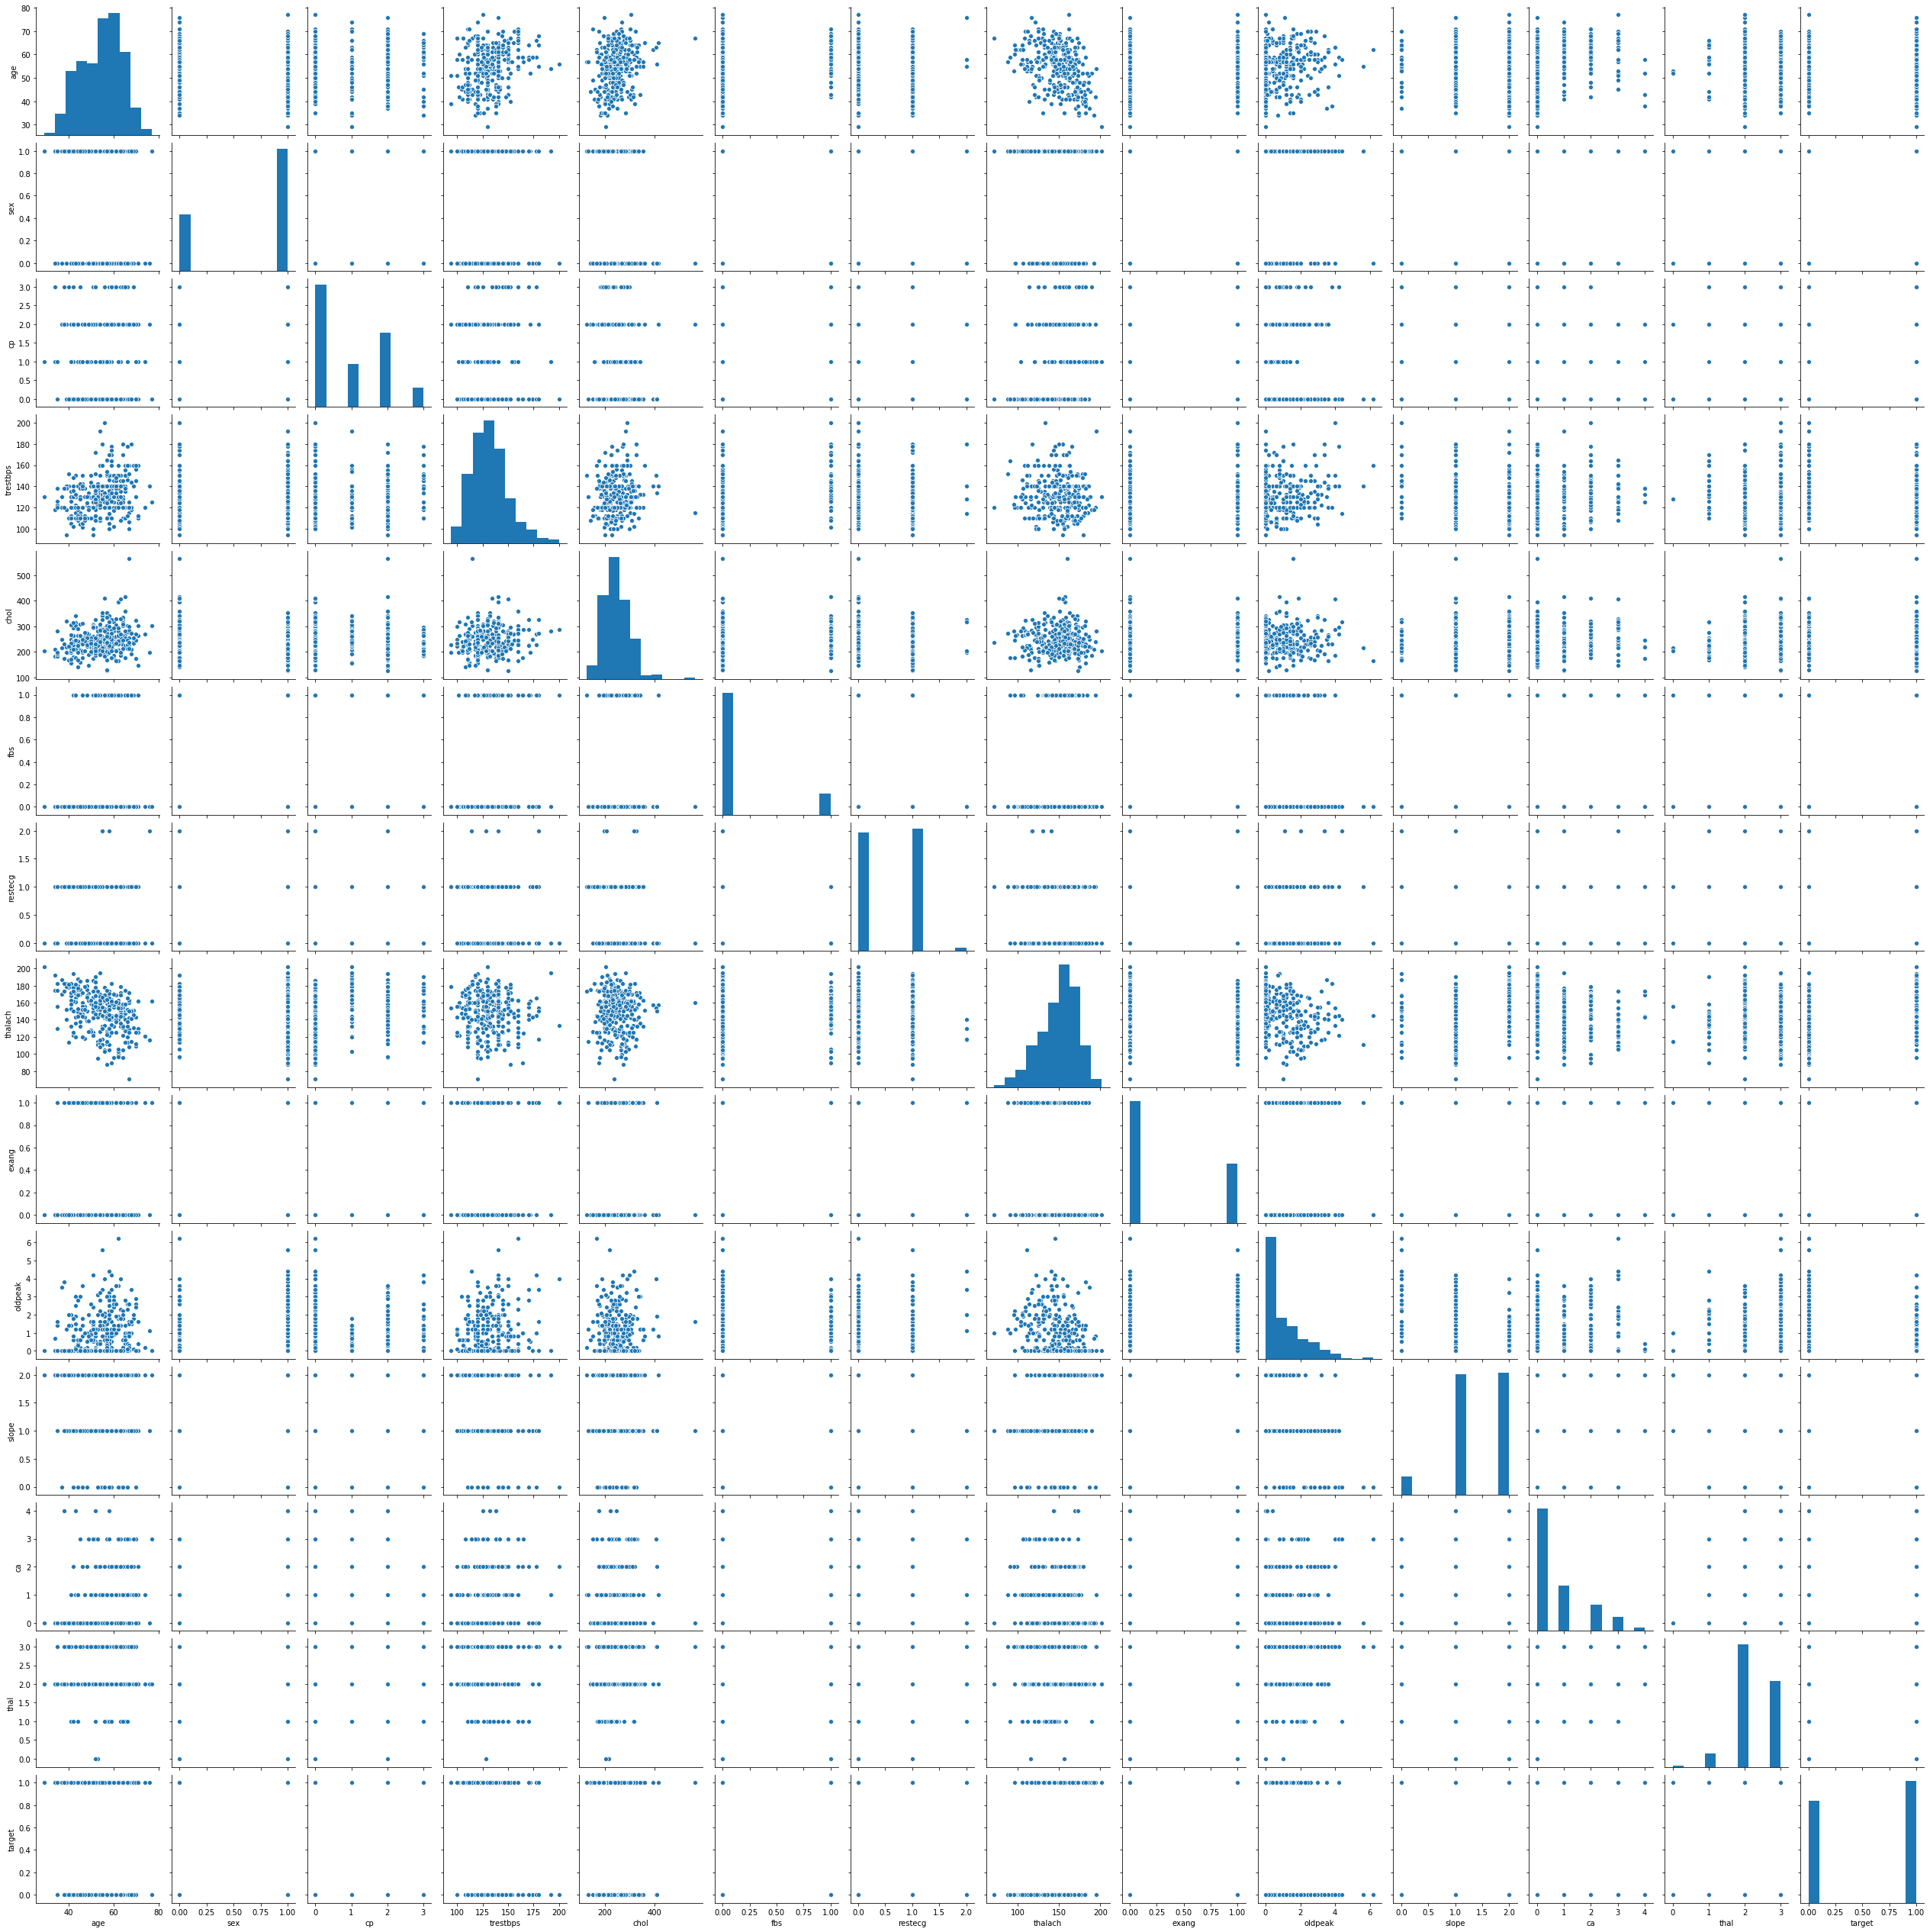

In [10]:
sbn.pairplot(df)

#### Implementation

- y = b_0 + b_1 * x
- Aiming to minimize the residual sum of squares (error terms)
- Standard error measures how each coeff varies under repeated sampling (the more spread out the x, the less wiggle room the slope has)
- We are minimizing the RSS, the coefficients are derived with calculus to find the minimum
- The fit makes a compromise for each of the errors, by taking the average of the squares (not fitting to any certain point)

In [3]:
import statistics
import numpy as np

Only implementing for simple lin reg

In [4]:
def mean(vals):
    mean = statistics.mean(list(vals))
    return np.array(mean)

def norm(vals):
    mean_vals = mean(vals)
    vals_norm = np.subtract(vals, mean_vals)
    return vals_norm

# TODO: fix coeffficients
# b_1 = sum( (x-x_mean) * (y-y_mean) ) / sum( (x-x_mean)**2) )
def coefficients(x,y):
    x_mean = mean(x)
    y_mean = mean(y)
    print(x_mean)
    b_1 = sum(norm(x) * norm(y)) / sum(norm(x)**2)
    print(b_1)
    b_0 = np.subtract(y_mean, (b_1 * x_mean))
    print(b_0)
    return b_0, b_1

# yi - y_hat
def residual_sum_squares(x,y):
    b_0, b_1 = coefficients(x,y)
    RSS = sum( (y - (b_0 + b_1 * x))**2 )
    return RSS

# Used to complete confidence intervals for the parameters, 95% = b_1 +- 2 * SE(b_1)
# spread of data (denominator) decreases error
def std_error(x):
    x_mean = mean(x)
    RSE = residual_std_error(x,y)
    errors = y - (b_0 + b_1 * x)
    b_1_err = RSE / sum(norm(x)**2)  
    b_0_err = RSE * ((1 / x.shape[0]) + (x_mean**2 / sum(norm(x)**2)))
    return b_0_err,b_1_err

def residual_std_error(x,y):
    RSE = sqrt( (1 / x.shape[0] - 2) * residual_sum_squares(x,y) )
    return RSE

def r_squared(x,y):
    RSS = residual_sum_squares(x,y)
    TSS = sum( norm(y)**2 )
    r_2 = 1 - RSS / TSS
    return r_2

def F_stat(x,y):
    TSS = sum( norm(y)**2 )
    RSS = residual_sum_squares(x,y)
    num_p = 1
    F = (TSS - RSS) / num_p / ( RSS / (x.shape[0] - num_p - 1) )

In [5]:
#x = df.drop(columns=['chol'])
x = df['oldpeak'].values
y = df['chol'].values

In [6]:
coefficients(x,y)

1.0396039603960396
2.4084305294798605
243.496186083214


(243.496186083214, 2.4084305294798605)

In [ ]:
#plot data

In [7]:
#sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y.reshape(-1,1))
print(reg.coef_,reg.intercept_)

[[2.40843053]] [243.76021249]


In [8]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
lm1 = smf.ols(formula='chol ~ oldpeak', data=df)

lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8787
Date:                Wed, 01 Apr 2020   Prob (F-statistic):              0.349
Time:                        22:18:05   Log-Likelihood:                -1625.2
No. Observations:                 303   AIC:                             3254.
Df Residuals:                     301   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    243.7602      4.001     60.932      0.000     235.888     251.633
oldpeak        2.4084      2.569      0.937      0.349      -2.648       7.464
==============================================================================
Omnibus:                       81.067   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.761
Skew:                           1.107   Prob(JB):                     2.20e-65
Kurtosis:                       7.323   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#plots of line and data

- Get p-value: probability of getting a value of t at least as large as you got
    - p-value < 0.05 is deemed significant
    - confidence interval will not contain 0, will give effect magnitude
    - merely answers how t"he evidence is of a non-zero association (weak effect can be very significant)
- As a baseline:
    - Choose features based on p-value
    - Observe how R^2 changes with different features

In [475]:
def confidence_interval():
    pass

#### Performance

1. R^2: how well the model fits the data, fraction of variance explained by the model
     - TSS: is inherent variability before regression is performed, RSS is variability left unexplained after the model is fit
     - How well do we reduce the TSS, relative to itself (TSS-RSS/TSS)
     - Squared correlation between X & y
     - Domain decides threshold for acceptance
3. MSE/RMSE:  closer to 0 the better
4. Residuals: should be random and iid

#### Improvements

1. Many models -> ensembling: create inputs for a final model
2. Check initially for linear trend
3. Try handling outliers
4. Standardize/Transform variables (Log of positive vars)
5. Interaction or polynomials
6. Assure one variable is not a surrogate for another, 'taking credit' (mult lin reg)

#### Interpretation

- Coefficients: for every 1 unit increase in X, y_pred increases by x_coeff
- 95% confidence interval:  we are 95% confident that the true slope lies in confidence interval over repeated sampling
- Helps to decide what input to keep
- Standard error roughly tells us the average amount that this estimate different from the actual value
- Residual standard error tells us roughly the average amount the response will deviate from the true regression line (lack of fit), measured in units of y
- F statistics: at least one of the parameters has a significant linear relationship with the response. Adjusts the probability based on number of params (5% will be significant by chance)

#### When to use

1. To determine existence/strength of predictions (sales -> spend)
2. When you have low dimensional data and want a quick baseline
3. Forecasting an effect or trend (how accurately can we predict future costs)